In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Public_data/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## FACTOR SELECTION
Factors selected are as follows:type,	amount,	oldbalanceOrg,	newbalanceOrig,	nameDest,	oldbalanceDest,	newbalanceDest,	isFraud.




In [ ]:
columns = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# Handle Missing Data
# Impute missing values with the mean of the column
for col in columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(0, inplace=True)
#df[columns] = df[columns].fillna(0)

# Outlier detection using standard deviation and mean
mean = df['amount'].mean()
std = df['amount'].std()
data = df[np.abs(df.amount-mean) <= (3*std)]

# Normalizing transcation data
trans = MinMaxScaler()
df[columns] = trans.fit_transform(df[columns])
df_copy = df

#data transformation
# This converts all destination Merchants to 1 and other customers to 0
df['nameDest'] = df['nameDest'].str.startswith('M').map({True: 1, False: 0})
df['type'] = df['type'].map({'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'DEBIT':4,'CASH_IN':5})

# Dropping unecessary data
df = df.drop(['step','nameOrig'],axis=1)
df

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0.000106,0.002855,0.003233,1,0.000000,0.000000,0,0
1,1,0.000020,0.000357,0.000391,1,0.000000,0.000000,0,0
2,2,0.000002,0.000003,0.000000,0,0.000000,0.000000,1,0
3,3,0.000002,0.000003,0.000000,0,0.000059,0.000000,1,0
4,1,0.000126,0.000697,0.000603,1,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
6362615,3,0.003674,0.005701,0.000000,0,0.000000,0.000954,1,0
6362616,2,0.068272,0.105923,0.000000,0,0.000000,0.000000,1,0
6362617,3,0.068272,0.105923,0.000000,0,0.000192,0.017912,1,0
6362618,2,0.009195,0.014265,0.000000,0,0.000000,0.000000,1,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

#K-Nearest Neighbours MODEL FOR (isFraud)
The k-Nearest Neighbors (k-NN) algorithm is a simple, yet powerful, machine learning algorithm that can be used for fraud detection. The basic idea behind k-NN is that similar samples are likely to belong to the same class.

In [ ]:
X = df.drop(['isFraud','isFlaggedFraud'],axis=1)
y = df['isFraud']
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.33, shuffle=True)



# Train Model With K from 1 to 10 using Elbow Method


In [ ]:
error_rate = []
accuracy = []
for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  # Make predictions on the test set
  y_pred = knn.predict(X_test)
  # Evaluate the performance
  accuracy.append(accuracy_score(y_test, y_pred))
  error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

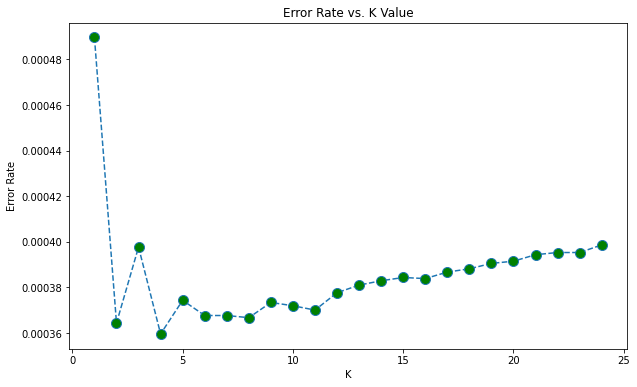

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate, linestyle='dashed', marker='o',markerfacecolor='Green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(accuracy)
print(accuracy[4])

[0.9995103980873139, 0.9996356561641976, 0.9996023175125556, 0.9996404188287179, 0.999625654568705, 0.9996323222990334, 0.9996323222990334, 0.9996332748319374, 0.9996266071016091, 0.9996280359009652, 0.9996299409667733, 0.9996223207035408, 0.9996189868383766, 0.9996170817725685, 0.9996156529732124, 0.9996161292396645, 0.9996132716409523, 0.9996118428415962, 0.999609461509336, 0.9996085089764319, 0.9996056513777197, 0.9996046988448157, 0.9996046988448157, 0.9996013649796515]
0.999625654568705


#Confusin Matrix & Classification Report
Confusion matrix is a table that summarizes the performance of a classifier. It shows the number of true positive, true negative, false positive, and false negative predictions made by the classifier.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2096808     109]
 [    646    2102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096917
           1       0.95      0.76      0.85      2748

    accuracy                           1.00   2099665
   macro avg       0.98      0.88      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

